# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

We, Team 8, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#fivepointone>5.1 Linear Regression model</a>

<a href=#fivepointtwo>5.2 Model 2</a>

<a href=#fivepointthree>5.3 Random Forest</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [37]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import datetime #To determine day of week

# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42
KFOLD = 10

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
df = pd.read_csv('df_train.csv', index_col=0)
df_original = df.copy() # Original copy of dataframe. Before edits
df.head(10) 

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667
5,2015-01-01 18:00:00,1.000000,level_7,0.0,1.000000,69.666667,67.333333,12.333333,0.666667,0.0,...,274.639229,284.165625,277.919000,277.919000,284.165625,277.919000,282.077844,274.639229,274.639229,6842.000000
6,2015-01-01 21:00:00,1.000000,level_8,0.0,1.000000,83.666667,63.333333,16.333333,1.000000,0.0,...,268.287000,283.420333,274.295437,274.295437,283.420333,274.295437,277.637000,268.287000,268.287000,10760.333333
7,2015-01-02 00:00:00,1.000000,level_9,0.0,1.000000,83.666667,64.000000,8.666667,1.333333,0.0,...,266.882333,282.474000,272.903167,272.903167,282.474000,272.903167,276.457333,266.882333,266.882333,10866.000000
8,2015-01-02 03:00:00,1.000000,level_9,0.0,1.000000,86.000000,63.333333,5.333333,1.000000,0.0,...,266.226667,281.726667,271.780115,271.780115,281.726667,271.780115,276.151667,266.226667,266.226667,-1850.333333
9,2015-01-02 06:00:00,1.000000,level_9,0.0,1.333333,87.000000,63.666667,15.333333,1.000000,0.0,...,266.878000,281.803000,271.673667,271.673667,281.803000,271.673667,276.453000,266.878000,266.878000,-4002.333333


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


df.shape shows the dimensions of our dataset, 8763 rows and 48 columns

In [7]:
df.shape

(8763, 48)

As shown below, there are 3 non-numeric columns in the dataframe: time, Valencia_wind_deg and Seville_pressure. Additionally Valencia_pressure seems to be missing a large amount of data


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

Valencia_pressure is missing 2068 entires. That is approximately a quarter of all the rows in that column! There are two options available to us:
1. We could impute values by commputing the mean for the entire column
2. We could impute values by computing the mean from similar columns for each row (ie Barcelona Pressure, Madrid Pressure etc)
3. We could delete the entire column
Given the sheer number of observations missing, it may be wise to just delete the whole column, especially if it is not strongly correlated with the response variable we want to predict

In [9]:
df['Valencia_pressure'].isnull().sum()

2068

Seville pressure column contains text data that is clearly in a completely different format to other pressure columns. We have decided to remove it as we cannot determine whether it is eroneous data or not and how to correctly convert it into numerical data

In [20]:
df['Seville_pressure'].head(5)

0    sp25
1    sp25
2    sp25
3    sp25
4    sp25
Name: Seville_pressure, dtype: object

Valencia_wind_deg column also contains text data that is not useable for model training. We have decided to deleted for this reason.

In [22]:
df['Valencia_wind_deg'].head(5)

0     level_5
1    level_10
2     level_9
3     level_8
4     level_7
Name: Valencia_wind_deg, dtype: object

It is likely that the time column contains useful information. It is not suitable for model training in its current form because it is text data. The most straightforward method to convert it into 5 columns containing numeric data -- each containing one of: year, month, day of week, day of month and the time in hours.
ie 2015-01-01 03:00:00 -> | 2015 | 01 | 01 | 3 | 4 |
These new columns would all be numeric and therefore accessible to the models we want to train

In [15]:
df['time'].head(2)

0    2015-01-01 03:00:00
1    2015-01-01 06:00:00
Name: time, dtype: object

All the temperature columns in this dataset seem to have very similar mean, std, min and max values. This may be due to multicollinearity.  If they are all correlated with each other they could decrease the accuracy of any models we train unless we deal with them in some way.

In [10]:
# look at data statistics
df.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,12.666667,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


Need to talk about skew or remove it...

In [16]:
df.skew()

<ipython-input-16-9e0b1e29546f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_max        0.082672
Valencia_temp 

Must talk about kurtosis otherwise remove it...

In [12]:
df.kurtosis()

<ipython-input-12-c7edf97eb14c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0.515989
Madrid_pressure            2

These density plots indicate the distribution patterns of each variable. Some features exhibit high levels of variance such as the temperature features and humidity. Others, like Seville_rain_1h and Bilbao_snow_3h have very little variance with the overwhelming majority of values being very similar or near identical. Features like this with very little variance probably don't contain much useful infomation that can be used to predict the value of our response variable. If they are not correlated with the response variable then they should probably be removed.

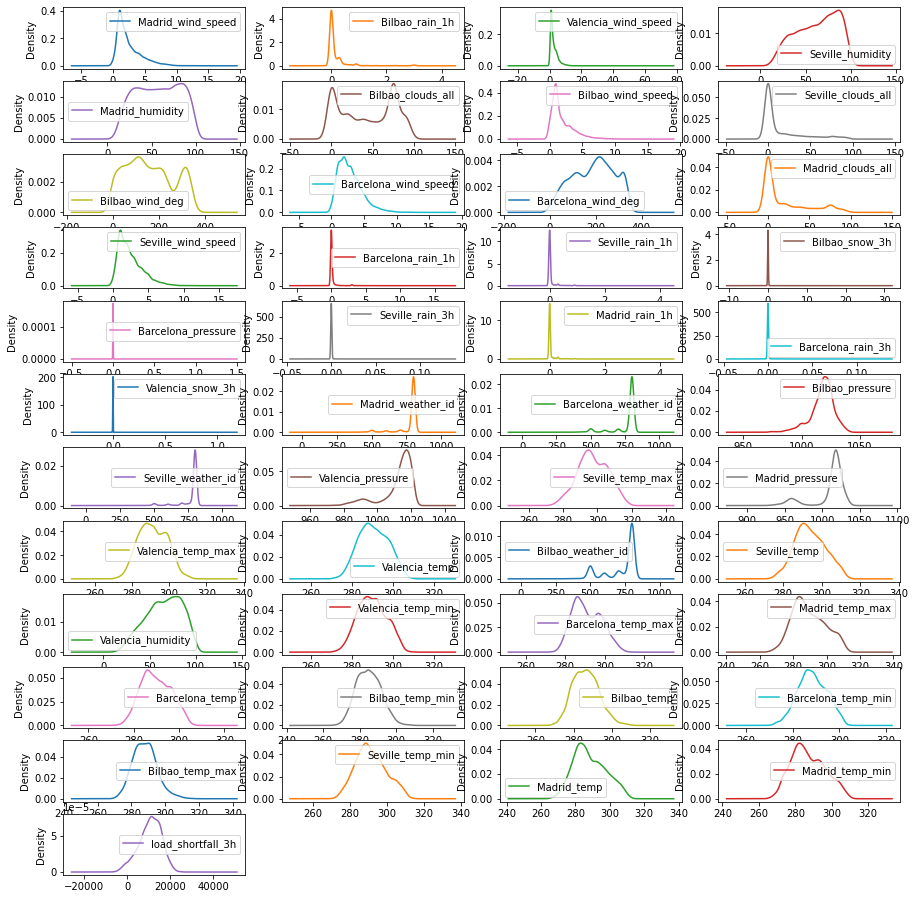

In [13]:
df.plot(kind='density', subplots=True, layout=(15, 4), sharex=False, figsize=(15, 20));

In [ ]:
#ONLY RUN ONCE ALL FEATURE ENGINEERING HAS BEEN DONE
# plot relevant feature interactions
#Due to the number of visuals created, this codeblock takes a long time to run (very sorry!)
#It is also enormous. Must figure out a solution
columns = ['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id', 'Seville_temp_max', 'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp', 'Madrid_temp_min']
columns_reduced = ['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed', 'Seville_pressure', 'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id', 'Seville_temp_max', 'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp', 'Madrid_temp_min']
g = sns.pairplot(df, vars=columns_reduced)
g.fig.set_size_inches(60,60)
# g.fig

Below is a matrix of Pearson's Correlation coefficients to determine the existence of linear relationships between predictor features. A value of +1 indicates a perfect positive correlation between two features. A value of 0 means no correlation and -1 means a perfect negative correlation. Given the size of the matrix is is better to visualize it with a heatmap as done below

In [17]:
# evaluate correlation
df.corr()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,0.275317,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,0.136591,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,0.177393,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800
Barcelona_wind_speed,0.294640,0.069997,0.347966,-0.138625,-0.058518,0.094019,0.275317,0.136591,0.177393,1.000000,...,0.084209,0.116240,0.123403,0.120361,0.109268,0.109692,0.130367,0.089365,0.084679,-0.103633


As shown below, It is clear that the dataset has a severe case of multicollinearity with the temperature features. All of the temperature features have correlations > 0.7, this is significantly higher than the correlation between said features and the feature we are trying to predict. There is a similar case of collinearity between the Seville and Madrid humidity features, which have a correlation of 0.8, far more significant than their correlation with the response variable, load_shortfall_3h.
A solution here is to merge all the temperature columns into one aggregate column with the mean temperature value for each row. And do a the same thing for both humidity columns. Since the multicollinearity exhibited by these features is so high relative to their correlation with the response variable it is likely that dropping so many columns will not lead to any significant loss of information that may be useful for prediction. Additionally, dropping columns with low predictive potential can also reduce the computation cost of model training.

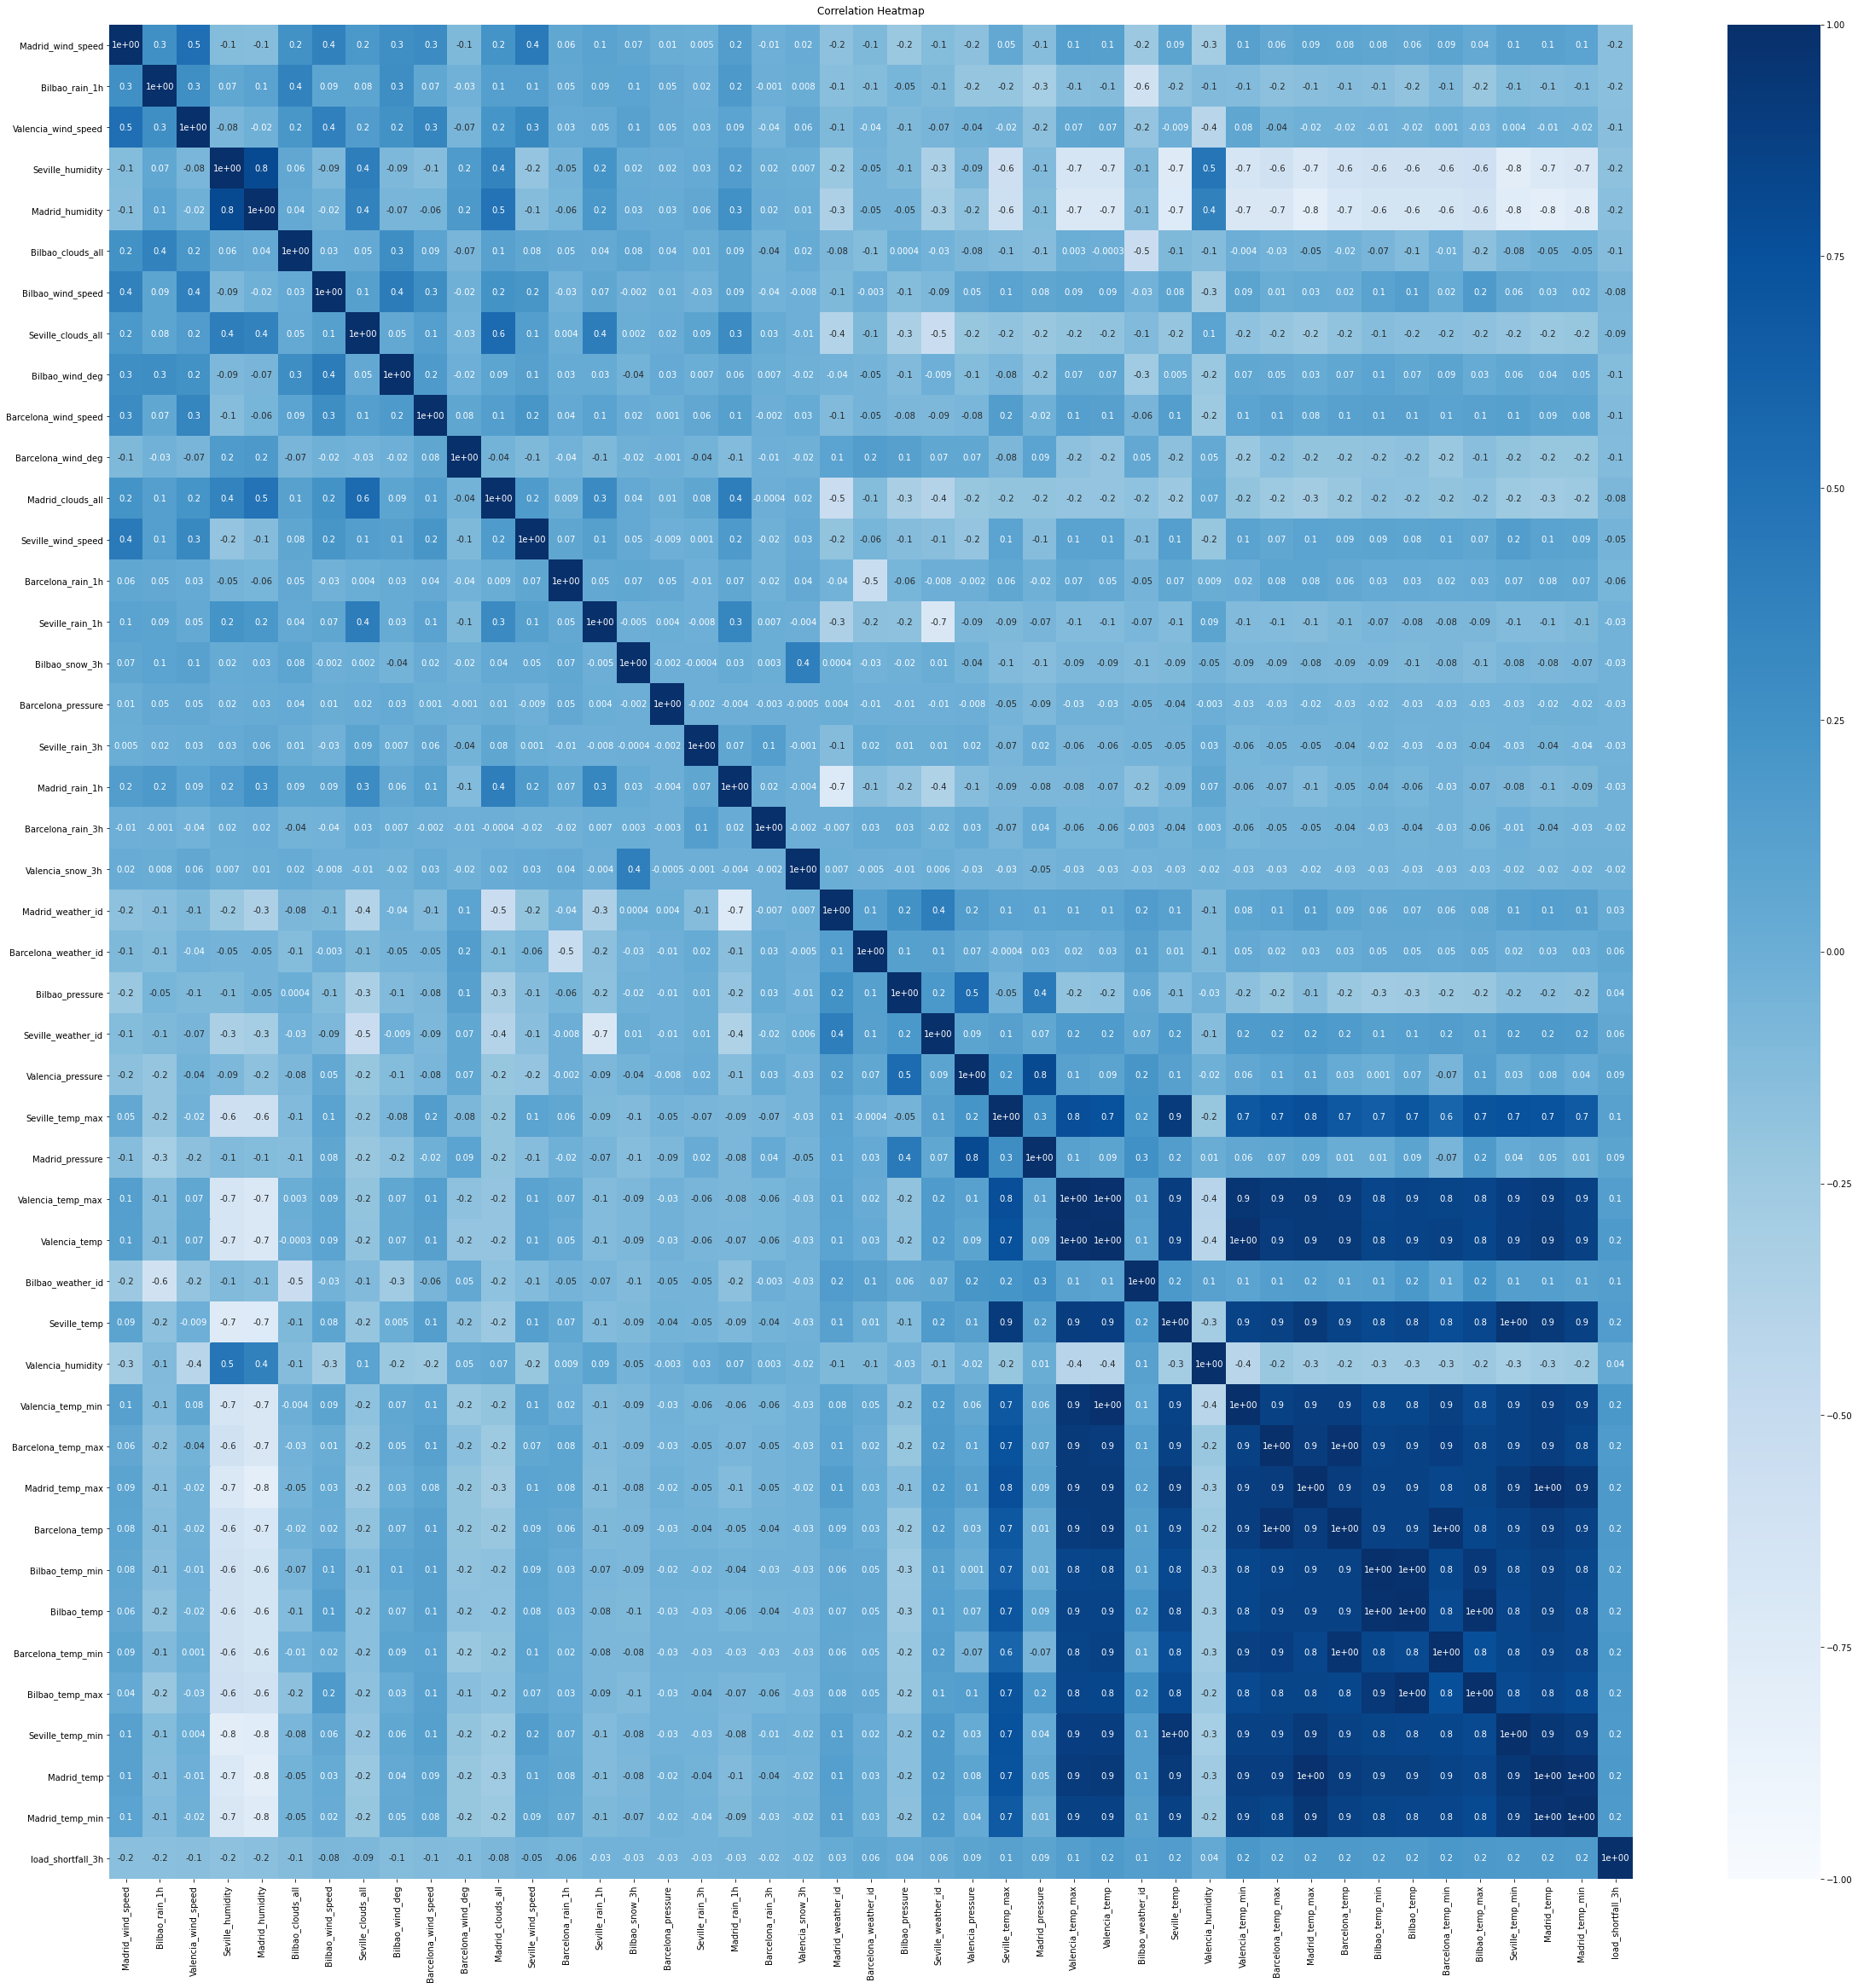

In [18]:
plt.figure(figsize=(40, 40))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='Blues', fmt=".1")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
# - Strong positive correlations between temperature metrics
# Strong negative correlations between seville, Madrid humidity and all temperature metrics

To do for Data Engineering phase
- Eliminate sources of multicollinearity identified by combining multiple features into single average features
- Edit existing features such as time so that information is numerical and can then be used to train models
- Drop columns that have large amounts of missing data. And those that have data that is incorrect.
    - Seville_pressure and Valencia_wind_deg
    - Orginal time column 

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

Combining all temperature columns into one average temperature column. Dropping all other temperature columns

In [3]:
temp_columns = ['Seville_temp_max','Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp', 'Seville_temp','Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max','Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp','Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min','Madrid_temp', 'Madrid_temp_min']
df_mean = df[temp_columns]
temp_means = df_mean.mean(axis=1)
df.insert(len(df.columns), 'cities_average_temp', temp_means, allow_duplicates=False)
df = df.drop(temp_columns, axis=1)
df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Bilbao_weather_id,Valencia_humidity,load_shortfall_3h,cities_average_temp
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,0.0,800.0,800.0,1035.000000,800.0,1002.666667,800.0,75.666667,6715.666667,315.789386
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,0.0,800.0,800.0,1035.666667,800.0,1004.333333,800.0,71.000000,4171.666667,316.541229
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,0.0,800.0,800.0,1036.000000,800.0,1005.333333,800.0,65.666667,4274.666667,320.772543
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,0.0,800.0,800.0,1036.000000,800.0,1009.000000,800.0,54.000000,5075.666667,327.808780
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,0.0,800.0,800.0,1035.333333,800.0,NaN,800.0,58.333333,6620.666667,330.146927


The columns Madrid_humidity and Seville_humidity are also combined by calculating the average for each row. The original columns are dropped

In [4]:
humid_columns = ['Madrid_humidity', 'Seville_humidity']
humid_mean_df = df[humid_columns]
humid_means = humid_mean_df.mean(axis=1)
df.insert(2, 'Madrid_Seville_humidity', humid_means, allow_duplicates=False)
df = df.drop(humid_columns, axis=1)
df.head()

,time,Madrid_wind_speed,Madrid_Seville_humidity,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Bilbao_weather_id,Valencia_humidity,load_shortfall_3h,cities_average_temp
0,2015-01-01 03:00:00,0.666667,69.166667,level_5,0.0,0.666667,0.0,1.000000,0.0,223.333333,...,0.0,800.0,800.0,1035.000000,800.0,1002.666667,800.0,75.666667,6715.666667,315.789386
1,2015-01-01 06:00:00,0.333333,71.500000,level_10,0.0,1.666667,0.0,1.000000,0.0,221.000000,...,0.0,800.0,800.0,1035.666667,800.0,1004.333333,800.0,71.000000,4171.666667,316.541229
2,2015-01-01 09:00:00,1.000000,67.833333,level_9,0.0,1.000000,0.0,1.000000,0.0,214.333333,...,0.0,800.0,800.0,1036.000000,800.0,1005.333333,800.0,65.666667,4274.666667,320.772543
3,2015-01-01 12:00:00,1.000000,60.833333,level_8,0.0,1.000000,0.0,1.000000,0.0,199.666667,...,0.0,800.0,800.0,1036.000000,800.0,1009.000000,800.0,54.000000,5075.666667,327.808780
4,2015-01-01 15:00:00,1.000000,58.000000,level_7,0.0,1.000000,2.0,0.333333,0.0,185.000000,...,0.0,800.0,800.0,1035.333333,800.0,NaN,800.0,58.333333,6620.666667,330.146927


Here we are re-engineering the time column by creating 5 new columns: year, month, day, hour and day_of_week. Each of these columns will contain numerical data and the original time column will be dropped. The reason for adding day of the week as a feature is that it may be a factor when predicting load_shortfall_3h. In South Africa during loadshedding, the weekends are often when load-shedding is reduced or eliminated as power consumption is usually reduced.

In [6]:
def extract_year(datetime):
    temp = datetime.split(" ")
    date = None
    if '/' in temp[0]:
        date = temp[0].split('/')
    else:
        date = temp[0].split('-')
    return int(date[0])

def extract_month(datetime):
    temp = datetime.split(" ")
    date = None
    if '/' in temp[0]:
        date = temp[0].split('/')
    else:
        date = temp[0].split('-')
    return int(date[1])

def extract_day(datetime):
    temp = datetime.split(" ")
    date = None
    if '/' in temp[0]:
        date = temp[0].split('/')
    else:
        date = temp[0].split('-')
    return int(date[2])

def extract_hour(datetime):
    temp = datetime.split(" ")
    date = None
    if '/' in temp[0]:
        date = temp[0].split('/')
    else:
        date = temp[0].split('-')
    time = temp[1].split(':')
    return int(time[0])

def extract_day_of_week(info):
    temp = info.split(" ")
    date = None
    if '/' in temp[0]:
        date = temp[0].split('/')
    else:
        date = temp[0].split('-')
    time = temp[1].split(':')
    ans = datetime.date(int(date[0]), int(date[1]), int(date[2]))
    weekday = ans.isocalendar()[2]
    return weekday

df['Year'] = df['time'].apply(extract_year)
df['Month'] = df['time'].apply(extract_month)
df['Day'] = df['time'].apply(extract_day)
df['Hour'] = df['time'].apply(extract_hour)
df['Day_of_Week'] = df['time'].apply(extract_day_of_week)

Dropping all columns with text data

In [8]:
df = df.drop('time', axis=1)
df = df.drop('Seville_pressure', axis=1)
df = df.drop('Valencia_wind_deg', axis=1)
df = df.drop('Valencia_pressure', axis=1)

The columns in the dataframe are now not in an ideal order, we are going to move the new time columns to the left hand side and the load_shortfall_3h column will be moved into a separate dataset. Essentially, we are making targets and features datasets

In [23]:
X = df[['Year', 'Month', 'Day', 'Hour', 'Day_of_Week', 'Madrid_wind_speed', 'Madrid_Seville_humidity', 
'Bilbao_rain_1h', 'Valencia_wind_speed', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
 'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
 'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
 'Barcelona_rain_1h', 'Seville_rain_1h', 'Bilbao_snow_3h',
 'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
 'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
 'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
 'Bilbao_weather_id', 'Valencia_humidity', 'cities_average_temp']]
y = df[['load_shortfall_3h']]

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

<a id="fivepointone"></a>
## Model 1: SKLearn's linear regression
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

The first model our team trained was a simple linear regression model using SKLearn.

**Step 1**: Create a train-test split for the linear regression model to be trained and then tested on.

In [24]:
#Splitting data here (no scaling)
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, test_size=0.2, random_state=PARAMETER_CONSTANT)

**Step 2**: Create a linear regression class object

In [25]:
lm = LinearRegression()

**Step 3**: Train the model using the training dataset

In [26]:
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

Extracting the y-intercept of the linear model

In [27]:
beta_0 = float(lm.intercept_)

Extracting coefficient values for every Bj in the model

In [28]:
beta_js = pd.DataFrame(lm.coef_.T, x.columns, columns=['Coefficient'])

Below is the y-intercept and linear coefficients for each of the features in the dataset. The value of each coefficient is an indication of how much of an effect a particular feature has on the response variable that we are trying to predict. Negative values indicate a negative relationship and vice versa.

In [29]:
print("Intercept:", beta_0)

Intercept: -1325809.5830673957


In [30]:
beta_js

,Coefficient
Year,645.188711
Month,176.117637
Day,53.024666
Hour,89.894222
Day_of_Week,-384.183492
Madrid_wind_speed,-222.739492
Madrid_Seville_humidity,-28.754917
Bilbao_rain_1h,-465.508133
Valencia_wind_speed,-53.005084
Bilbao_clouds_all,-6.847437


<a id="fivepointtwo"></a>
## Model 2:
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

**Step 1:** Scale predictor dataset and create a train-test split

In [91]:
# Scale and split dataset into train and test sets
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_scaled, y, test_size=0.5, random_state=PARAMETER_CONSTANT, shuffle=True)

**Step 2:** Create a LASSO model object and specify its parameters. Fit it using training data.

In [92]:
# Create LASSO model object and extract coefficient and intercept from model
lasso_model = Lasso(alpha=0.1, max_iter = 100000,tol= 0.0001)
lasso_coef = lasso_model.fit(X_train_lasso,y_train_lasso).coef_
coeff = pd.DataFrame(lasso_model.coef_, X.columns, columns=['Coefficient'])

In [93]:
intercept = float(lasso_model.intercept_)
print("Intercept:", float(intercept))

Intercept: 10651.19503003174


In [94]:
coeff

,Coefficient
Year,504.054532
Month,595.934087
Day,452.978317
Hour,638.600003
Day_of_Week,-795.833240
Madrid_wind_speed,-453.909667
Madrid_Seville_humidity,-683.225724
Bilbao_rain_1h,-150.382528
Valencia_wind_speed,-100.440202
Bilbao_clouds_all,-266.138052


<a id="fivepointthree"></a>
## Model 3:Random Forest with K-fold Cross-validation
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Targets and features datasets must be converted to np arrays to work with Kfold method

In [95]:
x_numpy = X.to_numpy()
y_numpy = y.to_numpy()

SkLearn's KFold class is used to generate the datasets needed for model training and cross-validation

In [96]:
kf = KFold(n_splits=KFOLD, shuffle=True, random_state=PARAMETER_CONSTANT)
X_train_RF, X_test_RF, y_train_RF, y_test_RF = [],[],[],[]
for train_index, test_index in kf.split(x_numpy):
    X_train_RF += [x_numpy[train_index]]
    X_test_RF += [x_numpy[test_index]]
    y_train_RF += [y_numpy[train_index]]
    y_test_RF += [y_numpy[test_index]]

Based on the value of the KFOLD constant, multiple train-test datasets have been created above. Below, SKLearn's RandomForestRegressor class is used to create and train KFOLD Random Forest models. WARNING: This cell will take 1-2 minutes to run.

In [45]:
model_list = []

for i in range(KFOLD):
    RF = RandomForestRegressor(n_estimators=100, max_depth=8, random_state= PARAMETER_CONSTANT) #n_estimators=100, max_depth=8 gives lowest rmse on kaggle
    XTr = X_train_RF[i]
    YTr = y_train_RF[i]
    XTe = X_test_RF[i]
    YTe = y_test_RF[i]
    #Train model
    RF.fit(XTr,np.ravel(YTr))
    model_list.append(RF)

Here we are using our models created above to predict y-values for the test set. MSE, RMSE and R-squared values for each model's predictions are determined. The model with the lowest RMSE is chosen as the best model going forward

In [48]:
model_mse = []
model_rmse = []
model_R2 = []
for i in range(KFOLD):
    model = model_list[i]
    #print("Model " + str(i+1) + ":")
    y_pred_val = model.predict(X_test_RF[i])
    mse = metrics.mean_squared_error(y_test_RF[i], y_pred_val)
    model_mse += [mse]
    #print('MSE:', mse)
    rmse = np.sqrt(metrics.mean_squared_error(y_test_RF[i], y_pred_val))
    model_rmse += [rmse]
    #print('RMSE:', rmse)
    R2 = metrics.r2_score(y_test_RF[i], y_pred_val)
    model_R2 += [R2]
    #print('R_squared:', R2)

min_rmse = min(model_rmse)
model_idx = model_rmse.index(min_rmse)
RF_model = model_list[model_idx]
RF_mse = model_R2[model_idx]
RF_rmse = min_rmse
RF_R2 = model_R2[model_idx]

In [49]:
val_dict = {'model mse':model_mse, 'model rmse': model_rmse, 'model R2': model_R2}
val_df = pd.DataFrame(val_dict)

As shown in the figure below, the prediction accuracy of random forests varies considerably for any given PARAMETER CONSTANT value. RMSE values for the 10 models produced varies between 3000 and 3500 when evaluating using the test datasets. It is therefore a good idea to train multiple Random Forest models and pick one or more that perform the best on some holdout dataset.

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

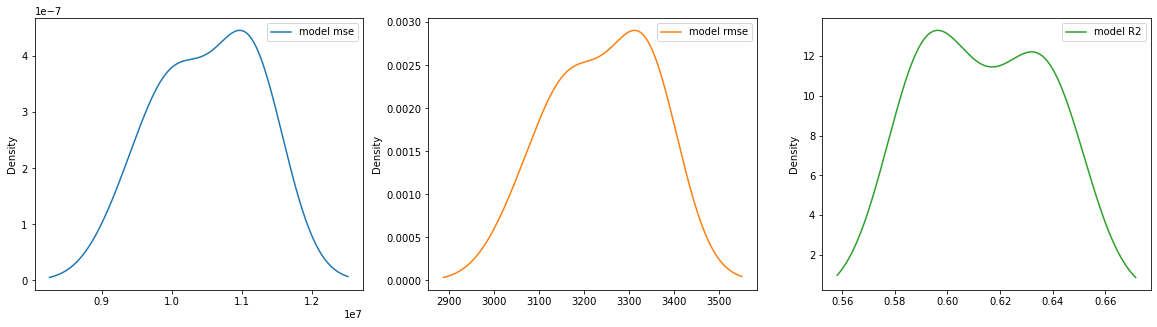

In [52]:
val_df.plot(kind='density', subplots=True, layout=(1, 3), sharex=False, figsize=(20, 5))

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

## Model 1: SKLearn's linear regression
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Get the linear model trained previously to make predictions based on holdout dataset and the training dataset

In [57]:
lm_pred_val = lm.predict(X_test_lm)
lm_pred_train = lm.predict(X_train_lm)

Determine the MSE,RMSE and R-squared metrics for the model's predictions by comparing them to the true values

In [60]:
test_mse_lm = metrics.mean_squared_error(y_test_lm, lm_pred_val)
test_rmse_lm = np.sqrt(metrics.mean_squared_error(y_test_lm, lm_pred_val))
test_R2_lm = metrics.r2_score(y_test_lm, lm_pred_val)

train_mse_lm = metrics.mean_squared_error(y_train_lm, lm_pred_train)
train_rmse_lm = np.sqrt(metrics.mean_squared_error(y_train_lm, lm_pred_train))
train_R2_lm = metrics.r2_score(y_train_lm, lm_pred_train)

print("Training:")
print("MSE:" + str(train_mse_lm))
print("RMSE:" + str(train_rmse_lm))
print("R-squared:" + str(train_R2_lm))
print("Testing:")
print("MSE:" + str(test_mse_lm))
print("RMSE:" + str(test_rmse_lm))
print("R-squared:" + str(test_R2_lm))

Train:
MSE:22505473.095692348
RMSE:4743.993370114713
R-squared:0.16616047322199523
Test:
MSE:23487436.098288268
RMSE:4846.383816650128
R-squared:0.1660146092982997


Comment about metrics goes here...

## Model 2:
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Get the LASSO regression model trained previously to make predictions based on holdout dataset and the training dataset

In [61]:
lasso_pred_val = lasso_model.predict(X_test_lasso)
lasso_pred_train = lasso_model.predict(X_train_lasso)

Determine the MSE,RMSE and R-squared metrics for the model's predictions by comparing them to the true values

In [62]:
test_mse_lasso = metrics.mean_squared_error(y_test_lasso, lasso_pred_val)
test_rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test_lasso, lasso_pred_val))
test_R2_lasso = metrics.r2_score(y_test_lasso, lasso_pred_val)

train_mse_lasso = metrics.mean_squared_error(y_train_lasso, lasso_pred_train)
train_rmse_lasso = np.sqrt(metrics.mean_squared_error(y_train_lasso, lasso_pred_train))
train_R2_lasso = metrics.r2_score(y_train_lasso, lasso_pred_train)

print("Training:")
print("MSE:" + str(train_mse_lasso))
print("RMSE:" + str(train_rmse_lasso))
print("R-squared:" + str(train_R2_lasso))
print("Testing:")
print("MSE:" + str(test_mse_lasso))
print("RMSE:" + str(test_rmse_lasso))
print("R-squared:" + str(test_R2_lasso))

Training:
MSE:22741583.63265088
RMSE:4768.813650442936
R-squared:0.16086433158378577
Testing:
MSE:23021936.80938799
RMSE:4798.118048713265
R-squared:0.1581987446895916


In [ ]:
results_dict = {'Training MSE': {"LASSO": metrics.mean_squared_error(y_train, train_lasso)},
                    'Test MSE': {"LASSO": metrics.mean_squared_error(y_test, test_lasso)}}

In [ ]:
# Create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)
results_df

## Model 3:Random Forest with K-fold Cross-validation
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Determine the MSE,RMSE and R-squared metrics for the model's predictions by comparing them to the true values

In [69]:
y_pred_train = RF_model.predict(X_train_RF[model_idx])
train_mse_RF = metrics.mean_squared_error(y_train_RF[model_idx], y_pred_train)
train_rmse_RF = np.sqrt(metrics.mean_squared_error(y_train_RF[model_idx], y_pred_train))
train_R2_RF = metrics.r2_score(y_train_RF[model_idx], y_pred_train)

print("Training:")
print("MSE:" + str(train_mse_RF))
print("RMSE:" + str(train_rmse_RF))
print("R-squared:" + str(train_R2_RF))
print("Testing:")
print("MSE:" + str(RF_mse))
print("RMSE:" + str(RF_rmse))
print("R-squared:" + str(RF_R2))

Training:
MSE:8029774.673059132
RMSE:2833.685704706704
R-squared:0.7065099614554706
Testing:
MSE:0.6415873652317425
RMSE:3052.615454584397
R-squared:0.6415873652317425


As shown in the figure below, the chosen Random Forest model had the lowest RMSE value of 3052.62 for its corresponding test dataset. This indicates it is the most accurate model for predicting unseen data out of the 3 models trained in this notebook.

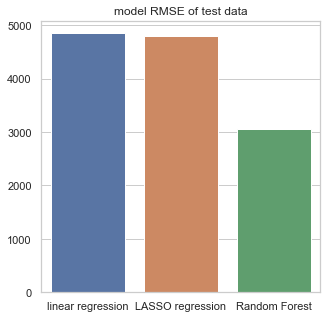

In [88]:
# Compare model performance
models_rmse = np.array([test_rmse_lm, test_rmse_lasso, RF_rmse])
df_rmse = {'linear regression': test_rmse_lm, 'LASSO regression':test_rmse_lasso, 'Random Forest':RF_rmse}
df_rmse = pd.DataFrame(df_rmse,index=[0])
plt.figure(figsize=(5, 5))
sns.set_theme(style="whitegrid")
barplot = sns.barplot(data = df_rmse).set_title('model RMSE of test data')

Shown in the figure below, the random forest model produces by far, the highest R-squared value during validation with each model's corresponding test dataset. R-squared or the coefficient of determination is a measure of the proportion of variance in the response variable (load_shortfall_3h) that can be collectively explained by the predictor variables (X-train, X_test datasets). A higher R-squared value indicates that a model accounts for more of the variance in an input dataset. However a low R-squared value for a model does not necessarily mean a model is flawed, datasets with large amounts of noisy data (high variance) will result in a lower R-squared value.

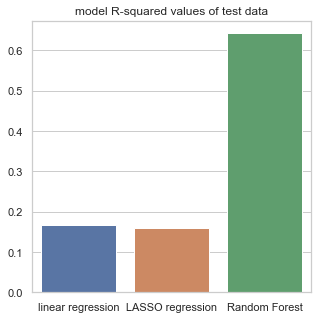

In [90]:
models_R2 = np.array([test_rmse_lm, test_rmse_lasso, RF_rmse])
df_R2 = {'linear regression': test_R2_lm, 'LASSO regression':test_R2_lasso, 'Random Forest':RF_R2}
df_R2 = pd.DataFrame(df_R2,index=[0])
plt.figure(figsize=(5, 5))
sns.set_theme(style="whitegrid")
barplot = sns.barplot(data = df_R2).set_title('model R-squared values of test data')

Compare model scores here...

Based on the RMSE and R-squared data presented in the two figures above, it is clear that the Random Forest model produces the most accurate predictions when fed unseen validation data.

Pick best model and justify choice here...

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic

WIll need to explain briefly how a random forest works here...